In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import os
import ssl
import random

ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
modelo_combinado =  keras.models.Sequential()
modelo_combinado.add(keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(32, 32, 1)))
modelo_combinado.add(keras.layers.MaxPooling2D((2, 2)))
modelo_combinado.add(keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
modelo_combinado.add(keras.layers.MaxPooling2D((2, 2)))
modelo_combinado.add(keras.layers.Flatten())
modelo_combinado.add(keras.layers.Dense(800, activation='relu', kernel_initializer='he_uniform'))
modelo_combinado.add(keras.layers.Dense(120, activation='relu', kernel_initializer='he_uniform'))
modelo_combinado.add(keras.layers.Dense(84, activation='relu', kernel_initializer='he_uniform'))
modelo_combinado.add(keras.layers.Dense(36, activation='softmax'))

modelo_combinado.summary()

W0821 00:54:54.388634 140734889190848 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 800)               1280800   
_________________________________________________________________
dense_1 (Dense)              (None, 120)               9

In [7]:
dataset = "dataset/"

imagenesTrain = []
imagenesTest = []

clases = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9", "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z"]

samples = os.listdir(dataset)

#Dividimos entre el 80% y el 20%
totalImagenes = 0
nTrain = 0
nTest = 0

for s in range(len(samples)):
    carpetas = os.listdir(dataset+samples[s]+"/")
    claseStr = samples[s][7:]
    clase = clases[int(claseStr)-1]
    print(int(claseStr)-1,"->",clase)
    for d in range(len(carpetas)):
        if carpetas[d] == 'gen' or carpetas[d] == 'bmp':
            archivos = os.listdir(dataset+samples[s]+"/"+carpetas[d]+"/")
            nArchivosLocal = len(archivos)
            nTrainLocal = round(nArchivosLocal * 0.8)
            nTestLocal = nArchivosLocal - nTrainLocal
            totalImagenes += nArchivosLocal
            nTrain += nTrainLocal
            nTest += nTestLocal
            for f in range(len(archivos)):
                imagen = cv.imread(dataset+samples[s]+"/"+carpetas[d]+"/"+archivos[f])
                imagen = cv.cvtColor(imagen, cv.COLOR_BGR2GRAY)
                imagen = cv.resize(imagen, (32, 32))
                if f < nTrainLocal:
                    imagenesTrain.append([imagen,int(claseStr)-1,archivos[f]])
                else:
                    imagenesTest.append([imagen,int(claseStr)-1,archivos[f]])

32 -> W
33 -> X
1 -> 1
4 -> 4
3 -> 3
2 -> 2
34 -> Y
31 -> V
9 -> 9
27 -> R
16 -> G
20 -> K
18 -> I
25 -> P
17 -> H
26 -> Q
19 -> J
28 -> S
15 -> F
10 -> A
7 -> 7
29 -> T
5 -> 5
0 -> 0
6 -> 6
30 -> U
35 -> Z
8 -> 8
13 -> D
12 -> C
24 -> O
21 -> L
22 -> M
23 -> N
11 -> B
14 -> E


In [8]:
print("Total de imagenes para entrenar:",len(imagenesTrain))
print("Total de imagenes para comprobar:",len(imagenesTest))
print("--------------------------------------------")
print("nTrain:",nTrain)
print("nTest:",nTest)
print("nImgs",totalImagenes)

Total de imagenes para entrenar: 19377
Total de imagenes para comprobar: 4846
--------------------------------------------
nTrain: 19377
nTest: 4846
nImgs 24223


In [9]:
print("Antes de desordernar las imagenes",np.shape(imagenesTrain),"-",np.shape(imagenesTest))
random.shuffle(imagenesTrain)
random.shuffle(imagenesTest)
print("Despues de desordernar las imagenes",np.shape(imagenesTrain),"-",np.shape(imagenesTest))

Antes de desordernar las imagenes (19377, 3) - (4846, 3)
Despues de desordernar las imagenes (19377, 3) - (4846, 3)


In [10]:
print("Comprobemos que quedo el arreglo desordenado")
print("Clase\tImagen\tTRAIN")
for i in range(50):
    print(imagenesTrain[i][1],"\t",imagenesTrain[i][2])

Comprobemos que quedo el arreglo desordenado
Clase	Imagen	TRAIN
14 	 bmp15-0119.png
10 	 A_0_rot3hsvall.png
12 	 C_5_rot0lab.png
18 	 I_16_rot3luvall.png
5 	 5_10_rot2luv.png
2 	 2_5_rot5hsv.png
23 	 bmp24-0271.png
30 	 U_41_thresh1_7.png
31 	 V_42_rot5hsv.png
25 	 P_30_con_6.png
18 	 I_16_rot0xyzall.png
4 	 4_8335.png
10 	 A_3470.png
0 	 0_0_rot2hsvall.png
12 	 C_5_canny1.png
7 	 7_3390.png
2 	 2_3176.png
26 	 Q_8170.png
20 	 K_20_rot0luvall.png
25 	 bmp26-0150.png
35 	 Z_50_rot6hsv.png
21 	 L_22_thresh1_2.png
16 	 bmp17-0053.png
7 	 7_1204.png
3 	 bmp04-0040.png
33 	 X_2866.png
33 	 X_47_rot7hlsall.png
26 	 Q_32_con_6.png
8 	 8_2233.png
14 	 E_9_rot5laball.png
33 	 X_47_rot6hsvall.png
29 	 T_1775.png
15 	 F_10_rot7xyz.png
10 	 A_5982.png
15 	 F_4630.png
14 	 bmp15-0124.png
29 	 bmp30-0051.png
27 	 bmp28-0039.png
14 	 E_9611.png
14 	 E_8_rot4bgr.png
26 	 bmp27-0019.png
30 	 bmp31-0062.png
10 	 bmp11-0117.png
9 	 9_900.png
0 	 0_0_rot7laball.png
14 	 E_8_rot0ycrcb.png
23 	 N_8726.png
7

In [11]:
print("Clase\tImagen\tTEST")
for i in range(50):
    print(imagenesTest[i][1],"\t",imagenesTest[i][2])

Clase	Imagen	TEST
27 	 bmp28-0292.png
8 	 8_17_canny6.png
27 	 R_4270.png
16 	 bmp17-0109.png
24 	 O_29_canny7.png
24 	 O_29_rot1lab.png
28 	 bmp29-0135.png
23 	 N_27_rot6hls.png
7 	 7_14_rot7bgr.png
21 	 L_22_gauss17_2.png
2 	 2_4_rot6ycrcb.png
7 	 7_128.png
14 	 E_8_rot0luvall.png
25 	 P_5538.png
24 	 O_29_rot1hls.png
7 	 7_14_rot2luvall.png
18 	 I_9014.png
11 	 B_2_rot7hlsall.png
7 	 7_2751.png
23 	 N_26_rot5luv.png
8 	 8_16_thresh2_0.png
21 	 L_23_rot7laball.png
2 	 2_5_rot4hsv.png
11 	 B_3_rot7hls.png
10 	 A_1_rot4rgball.png
19 	 J_18_thresh1_7.png
14 	 bmp15-0200.png
9 	 9_18_rot1luvall.png
21 	 L_23_rot7luvall.png
7 	 7_6126.png
25 	 P_2332.png
19 	 J_19_rot3gray.png
24 	 O_28_rot2luv.png
18 	 bmp19-0088.png
16 	 G_12_canny4.png
22 	 M_24_rot1grayall.png
17 	 bmp18-0098.png
8 	 8_1322.png
25 	 P_30_rot6laball.png
20 	 bmp21-0016.png
8 	 8_1278.png
27 	 R_2364.png
18 	 I_16_rot2hls.png
27 	 R_34_thresh1_1.png
11 	 B_3_rot7luv.png
13 	 bmp14-0164.png
28 	 bmp29-0294.png
17 	 H_14_

In [12]:
xTrain = []
yTrain = []
xTest = []
yTest = []

#Tomo las de entrenar
for i in range(len(imagenesTrain)):
    xTrain.append(imagenesTrain[i][0])
    yTrain.append(imagenesTrain[i][1])

#Tomo las de comprobar
for i in range(len(imagenesTest)):
    xTest.append(imagenesTest[i][0])
    yTest.append(imagenesTest[i][1])
    
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
xTest = np.array(xTest)
yTest = np.array(yTest)

xTrain = xTrain.reshape([-1, 32, 32, 1])
xTest = xTest.reshape([-1, 32, 32, 1])
xTrain = xTrain.astype('float32')
xTest = xTest.astype('float32')

xTrain /= 255
xTest /= 255

print(xTrain.shape, yTrain.shape, xTest.shape, yTest.shape)

print(yTrain[0:50])

print(yTest[0:50])

(19377, 32, 32, 1) (19377,) (4846, 32, 32, 1) (4846,)
[14 10 12 18  5  2 23 30 31 25 18  4 10  0 12  7  2 26 20 25 35 21 16  7
  3 33 33 26  8 14 33 29 15 10 15 14 29 27 14 14 26 30 10  9  0 14 23  7
 16 14]
[27  8 27 16 24 24 28 23  7 21  2  7 14 25 24  7 18 11  7 23  8 21  2 11
 10 19 14  9 21  7 25 19 24 18 16 22 17  8 25 20  8 27 18 27 11 13 28 17
 15 27]


In [13]:
print(np.shape(xTrain[0]))

(32, 32, 1)


In [10]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
modelo_combinado.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = modelo_combinado.fit(xTrain, yTrain, epochs=50, batch_size=64, validation_data=(xTest, yTest))

Train on 19377 samples, validate on 4846 samples
Epoch 1/50
19377/19377 [==============================] - 33s 2ms/sample - loss: 2.9803 - acc: 0.2442 - val_loss: 2.1838 - val_acc: 0.4757
Epoch 2/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.8392 - acc: 0.5548 - val_loss: 1.4910 - val_acc: 0.6457
Epoch 3/50
19377/19377 [==============================] - 37s 2ms/sample - loss: 1.2799 - acc: 0.6900 - val_loss: 1.1329 - val_acc: 0.7109
Epoch 4/50
19377/19377 [==============================] - 32s 2ms/sample - loss: 0.9940 - acc: 0.7611 - val_loss: 0.9473 - val_acc: 0.7641
Epoch 5/50
19377/19377 [==============================] - 47s 2ms/sample - loss: 0.8240 - acc: 0.8007 - val_loss: 0.8340 - val_acc: 0.7924
Epoch 6/50
19377/19377 [==============================] - 41s 2ms/sample - loss: 0.7068 - acc: 0.8297 - val_loss: 0.7177 - val_acc: 0.8341
Epoch 7/50
19377/19377 [==============================] - 45s 2ms/sample - loss: 0.6208 - acc: 0.8510 - val_loss: 0.6

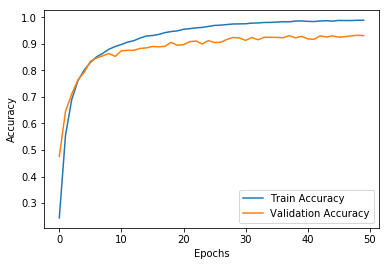

In [11]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [12]:
model_json = modelo_combinado.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_combinado.save_weights("modeloFinal.h5")
print("Modelo guardado")

Modelo guardado


In [13]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
#Abriendo pesos del modelo creado
loaded_model.load_weights("modeloFinal.h5")
print("Modelo cargado desde el computador")
 
#Evaluar el modelo cargado
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
loaded_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(xTest, yTest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

W0821 01:30:33.051874 140734889190848 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0821 01:30:33.675268 140734889190848 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling GlorotUniform.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Modelo cargado desde el computador
acc: 93.11%


W0821 01:30:39.587463 140734889190848 lazy_loader.py:50] 
The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



1/1 [==============================] - 0s 43ms/sample
Caracter: ' 6 '


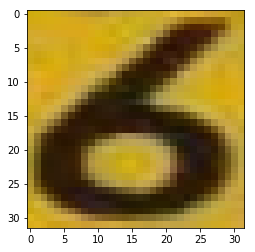

In [14]:
img = cv.cvtColor(cv.imread("pruebas/Letras/6.png"),cv.COLOR_BGR2RGB)
img = cv.resize(img, (32, 32))
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgG = tf.contrib.keras.preprocessing.image.img_to_array(imgG)
imgG = np.expand_dims(imgG, axis=0);
plt.imshow(img,cmap='gray');

features_res_classes = loaded_model.predict_classes(imgG, verbose=1)
print("Caracter: '",clases[features_res_classes[0]],"'")

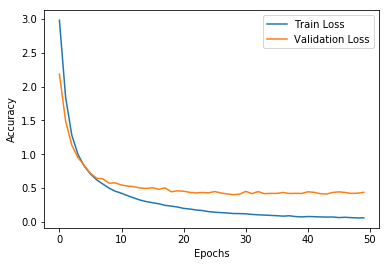

In [16]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

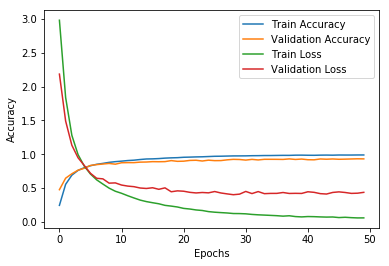

In [17]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [18]:
modelo_2 =  keras.models.Sequential()
modelo_2.add(keras.layers.Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid', input_shape=(32, 32, 1)))
modelo_2.add(keras.layers.MaxPooling2D((2, 2)))
modelo_2.add(keras.layers.Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='valid'))
modelo_2.add(keras.layers.MaxPooling2D((2, 2)))
modelo_2.add(keras.layers.Flatten())
modelo_2.add(keras.layers.Dropout(0.2))
modelo_2.add(keras.layers.Dense(800, activation='relu', kernel_initializer='he_uniform'))
modelo_2.add(keras.layers.Dense(120, activation='relu', kernel_initializer='he_uniform'))
modelo_2.add(keras.layers.Dense(84, activation='relu', kernel_initializer='he_uniform'))
modelo_2.add(keras.layers.Dropout(0.2))
modelo_2.add(keras.layers.Dense(36, activation='softmax'))

modelo_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1600)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 800)              

In [19]:
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
modelo_2.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history2 = modelo_2.fit(xTrain, yTrain, epochs=50, batch_size=64, validation_data=(xTest, yTest))

Train on 19377 samples, validate on 4846 samples
Epoch 1/50
19377/19377 [==============================] - 36s 2ms/sample - loss: 3.3120 - acc: 0.1287 - val_loss: 2.6014 - val_acc: 0.3933
Epoch 2/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 2.4458 - acc: 0.3757 - val_loss: 1.7939 - val_acc: 0.6121
Epoch 3/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.8880 - acc: 0.5211 - val_loss: 1.3902 - val_acc: 0.6766
Epoch 4/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.5447 - acc: 0.6032 - val_loss: 1.1488 - val_acc: 0.7332
Epoch 5/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.3378 - acc: 0.6556 - val_loss: 1.0001 - val_acc: 0.7676
Epoch 6/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.1736 - acc: 0.6916 - val_loss: 0.8922 - val_acc: 0.7959
Epoch 7/50
19377/19377 [==============================] - 35s 2ms/sample - loss: 1.0703 - acc: 0.7214 - val_loss: 0.8

In [20]:
model_json = modelo_combinado.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
modelo_combinado.save_weights("modeloFinalDrop.h5")
print("Modelo guardado")

Modelo guardado


In [2]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = keras.models.model_from_json(loaded_model_json)
#Abriendo pesos del modelo creado
loaded_model.load_weights("modeloFinalDrop.h5")
print("Modelo cargado desde el computador")
 


W0821 12:02:31.893424 140734893671872 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0821 12:02:31.897029 140734893671872 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:97: calling Zeros.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
W0821 12:02:32.121144 140734893671872 deprecation.py:506] From /Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/t

Modelo cargado desde el computador


In [ ]:
#Evaluar el modelo cargado
opt = keras.optimizers.SGD(lr=0.001, momentum=0.9)
loaded_model.compile(optimizer=opt, loss='sparse_categorical_crossentropy',metrics=['accuracy'])
score = loaded_model.evaluate(xTest, yTest, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

1/1 [==============================] - 0s 31ms/sample
Caracter: ' 6 '


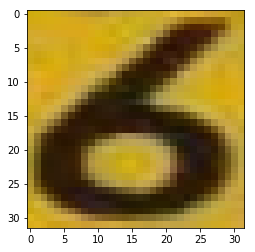

In [15]:
img = cv.cvtColor(cv.imread("pruebas/Letras/6.png"),cv.COLOR_BGR2RGB)
img = cv.resize(img, (32, 32))
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgG = tf.contrib.keras.preprocessing.image.img_to_array(imgG)
imgG = np.expand_dims(imgG, axis=0);
plt.imshow(img,cmap='gray');

features_res_classes = loaded_model.predict_classes(imgG, verbose=1)
print("Caracter: '",clases[features_res_classes[0]],"'")

1/1 [==============================] - 0s 9ms/sample
Caracter: ' 0 '


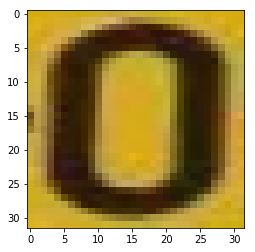

In [26]:
img = cv.cvtColor(cv.imread("pruebas/Letras/0.png"),cv.COLOR_BGR2RGB)
img = cv.resize(img, (32, 32))
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgG = tf.contrib.keras.preprocessing.image.img_to_array(imgG)
imgG = np.expand_dims(imgG, axis=0);
plt.imshow(img,cmap='gray');

features_res_classes = loaded_model.predict_classes(imgG, verbose=1)
print("Caracter: '",clases[features_res_classes[0]],"'")

1/1 [==============================] - 0s 4ms/sample
Caracter: ' C '


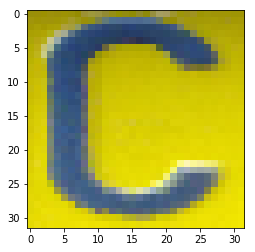

In [29]:
img = cv.cvtColor(cv.imread("pruebas/Letras/C.png"),cv.COLOR_BGR2RGB)
img = cv.resize(img, (32, 32))
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgG = tf.contrib.keras.preprocessing.image.img_to_array(imgG)
imgG = np.expand_dims(imgG, axis=0);
plt.imshow(img,cmap='gray');

features_res_classes = loaded_model.predict_classes(imgG, verbose=1)
print("Caracter: '",clases[features_res_classes[0]],"'")

1/1 [==============================] - 0s 2ms/sample
Caracter: ' I '


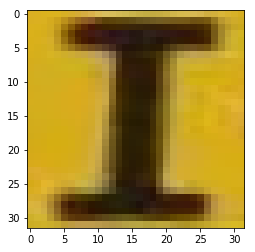

In [16]:
img = cv.cvtColor(cv.imread("pruebas/Letras/I.png"),cv.COLOR_BGR2RGB)
img = cv.resize(img, (32, 32))
imgG = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
imgG = tf.contrib.keras.preprocessing.image.img_to_array(imgG)
imgG = np.expand_dims(imgG, axis=0);
plt.imshow(img,cmap='gray');

features_res_classes = loaded_model.predict_classes(imgG, verbose=1)
print("Caracter: '",clases[features_res_classes[0]],"'")

### CNN
Resultados de la red convolucional

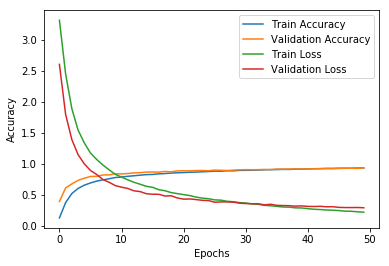

In [24]:
plt.plot(history2.history['acc'], label='Train Accuracy')
plt.plot(history2.history['val_acc'], label='Validation Accuracy')
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [32]:
print(xTrain.shape)

(19377, 32, 32, 1)


In [45]:
print(len(imagenesTrain),len(imagenesTest))

19377 4846


In [51]:
imagenes = []
clases = []

for i in imagenesTrain:
    imgFlat = i[0].reshape(32*32)
    imagenes.append(imgFlat)
    clases.append(i[1])
    
for i in imagenesTest:
    imgFlat = i[0].reshape(32*32)
    imagenes.append(imgFlat)
    clases.append(i[1])

In [52]:
imagenes = np.array(imagenes)
clases = np.array(clases)

In [53]:
print(imagenes.shape, clases.shape)

(24223, 1024) (24223,)


In [54]:
from sklearn.model_selection import train_test_split
test_size = 0.2
X_train, X_test, y_train, y_test = train_test_split(imagenes,clases,test_size=test_size)
print(y_test)

[29 15  0 ...  9 11  0]


## Random Forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

modelo_RF = RandomForestClassifier(n_estimators=100)

modelo_RF.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
print("Precision para las de Test con Random Forest:",modelo_RF.score(X_test, y_test))
print("Precision para las de Train con Random Forest:",modelo_RF.score(X_train, y_train))

Precision para las de Test con Random Forest: 0.8771929824561403
Precision para las de Train con Random Forest: 0.9941686448549902


## KNN

In [57]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)

neigh.fit(X_train, y_train)
print("Precision para las de Test con KNN:",neigh.score(X_test, y_test))
print("Precision para las de Train con KNN:",neigh.score(X_train, y_train))

Precision para las de Test con KNN: 0.743859649122807
Precision para las de Train con KNN: 0.8480235318402312
